In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('./data/norm_clustering_parameters.csv', engine='python')

In [3]:
df

,20남,30남,40남,50남,6-70남,20여,30여,40여,50여,6-70여,총인원
0,-0.382634,0.310759,1.100966,1.804019,0.162388,0.076755,-0.951850,-0.727646,-0.653284,-0.519918,0.262494
1,-0.994973,0.717259,1.333039,1.606822,0.081261,0.417628,-0.037413,-0.492793,-0.815933,-1.249034,0.805455
2,0.501705,0.634162,0.920105,1.184394,-0.469906,1.423454,-0.480482,-0.977976,-1.088827,-1.225541,0.422451
3,1.745788,-0.228621,-0.239800,0.469394,0.152443,1.350839,-1.471734,-1.100512,-0.629762,-0.107846,-0.415878
4,-0.523875,0.455289,1.272998,1.897142,0.047439,0.036917,-0.812880,-0.696849,-0.737733,-0.662877,-0.468300
...,...,...,...,...,...,...,...,...,...,...,...
1475,-0.669539,-0.642734,-0.619101,1.167970,1.174526,-1.053993,-0.966242,-0.369528,1.270503,0.722502,-1.399438
1476,1.649473,-0.944025,-0.949710,-0.153043,1.173068,0.512347,-1.339091,-1.277182,-0.024007,0.837856,1.131496
1477,1.407481,-1.284873,-1.076577,0.002911,1.726228,0.186338,-1.674323,-1.217189,0.145530,1.187498,1.225170
1478,1.316132,-1.121538,-0.908036,0.143013,1.637237,0.081538,-1.588513,-1.232011,0.135723,1.020995,1.162911


In [4]:
# 총인원 표준편차 조정
total_pop_factor = 2.5
df['총인원'] = [x*total_pop_factor for x in df['총인원']]

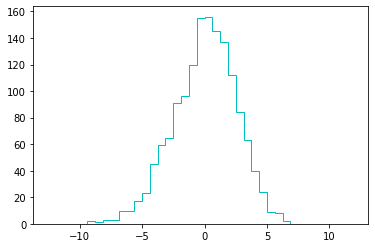

In [5]:
plt.hist(df['총인원'], bins=np.arange(-5*total_pop_factor, 5*total_pop_factor, 0.25*total_pop_factor), 
         alpha=1, histtype='step', color='c')
plt.show()

In [6]:
km = KMeans(n_clusters = 10, random_state = 0)
km.fit(df)
result = km.predict(df)

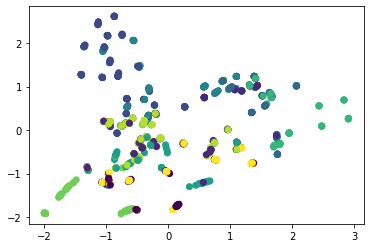

In [7]:
plt.scatter(df['20남'], df['6-70여'], c = result)
plt.show()

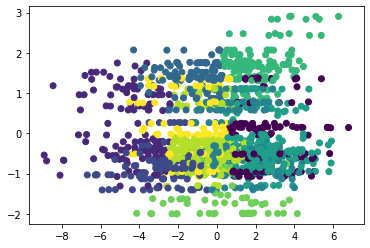

In [8]:
plt.scatter(df['총인원'], df['20남'], c = result)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:11<00:00,  2.42it/s]


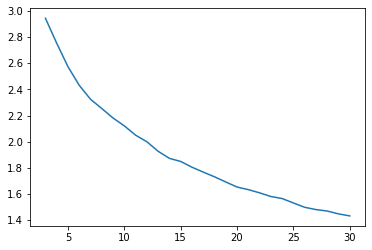

In [9]:
# elbow method
from scipy.spatial.distance import cdist
from tqdm import tqdm

min_K = 3
max_K = 30
distortions = np.zeros(max_K - min_K+1)

for K in tqdm(range(min_K, max_K+1)):
    km = KMeans(n_clusters = K, random_state = 0)
    km.fit(df)
    distortions[K-3] = sum(np.min(cdist(df, km.cluster_centers_, 'euclidean'), axis=1)) / len(df)
    
plt.plot(range(min_K, max_K+1), distortions)

In [14]:
K = 10

count = np.zeros(K)
for stn in range(len(df)):
    count[result[stn]] += 1
count

array([122., 138., 109., 108., 198., 186., 136.,  73., 299., 111.])

In [16]:
for i in range(K):
    dist_of_K = km.cluster_centers_[i]
    rank_1 = np.where(dist_of_K[0:10] == sorted(dist_of_K[0:10], reverse=True)[0])[0][0]
    rank_2 = np.where(dist_of_K[0:10] == sorted(dist_of_K[0:10], reverse=True)[1])[0][0]
    rank_3 = np.where(dist_of_K[0:10] == sorted(dist_of_K[0:10], reverse=True)[2])[0][0]
    print("cluster %d" % i, "(%3d objects)" % count[i], ":", 
          "%d," % rank_1, "%.3f" % dist_of_K[rank_1], "/", 
          "%d," % rank_2, "%.3f" % dist_of_K[rank_2], "/", 
          "%d," % rank_3, "%.3f" % dist_of_K[rank_3]) 

cluster 0 (122 objects) : 5, 2.044 / 6, 1.237 / 0, 0.887
cluster 1 (138 objects) : 8, 0.599 / 6, 0.546 / 7, 0.491
cluster 2 (109 objects) : 0, 1.204 / 5, 0.724 / 9, 0.697
cluster 3 (108 objects) : 3, 0.775 / 0, 0.767 / 5, 0.633
cluster 4 (198 objects) : 3, 0.518 / 1, 0.511 / 2, 0.349
cluster 5 (186 objects) : 4, 1.749 / 8, 1.676 / 9, 1.608
cluster 6 (136 objects) : 6, 1.273 / 2, 0.988 / 7, 0.882
cluster 7 ( 73 objects) : 3, 1.470 / 2, 1.119 / 1, 0.810
cluster 8 (299 objects) : 7, 2.608 / 8, 1.103 / 9, 0.461
cluster 9 (111 objects) : 0, 1.606 / 5, 0.815 / 9, 0.515
